In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import mpl_toolkits
import seaborn as sns

%matplotlib inline

We will fill the missing values with 0

In [3]:
datafile = pd.read_csv('loan.csv')
dataset = datafile.fillna(0)
X = dataset.iloc[:,[6,8]].values
X

array([[ 5849.,     0.],
       [ 4583.,   128.],
       [ 3000.,    66.],
       ..., 
       [ 3333.,    99.],
       [ 2500.,   104.],
       [ 8566.,   210.]])

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


PART 1: Clustering

Method 1 : K-Means

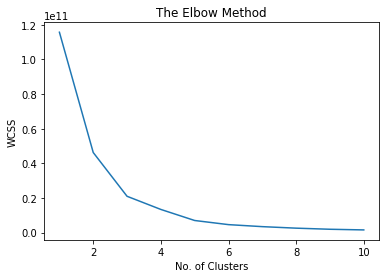

In [5]:
#using elbow method to find the optimal no. of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    #inertia - sum of squares within clusters
plt.plot(range(1,11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

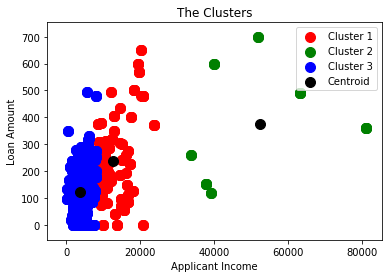

In [6]:
# Applying k-means to the dataset

kmeans = KMeans(n_clusters=3, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#display the clusters

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2, 1], s = 100, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100 , c = 'black', label = 'Centroid')
plt.title('The Clusters')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

Method 2: Hierarchical

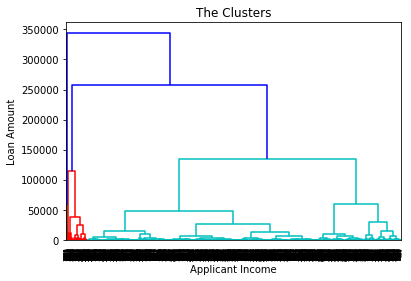

In [7]:
#using dendrogram to find the optimal no. of clusters

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))     #minimize variance for clusters
plt.title('The Clusters')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()


#draw horizontal lines from the top edges and consider the vertical line having the largest distance
#then draw a horizontal line passing through all the vertical lines coming in between and count the lines it is crossing to give the no of  clusters


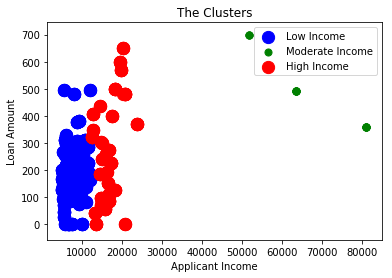

In [8]:
#Applying hierarchical clustering (agglomerative - top down)to the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#display the clusters

plt.scatter(X[y_hc == 0,0], X[y_hc ==0, 1], s = 150, c = 'blue', label = 'Low Income')
plt.scatter(X[y_hc == 1,0], X[y_hc ==1, 1], s = 50, c = 'green', label = 'Moderate Income')
plt.scatter(X[y_hc == 2,0], X[y_hc ==2, 1], s = 150, c = 'red', label = 'High Income')

plt.title('The Clusters')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

The clusters generated by both the methods are identical

Scaling doesnt affect the clustering

The cluster does show interesting groupings